# 911 Calls 

For this project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd


**Import visualization libraries and set %matplotlib inline.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [3]:
df = pd.read_csv('911.csv')

**Check the info of the df**

In [4]:
df.info

<bound method DataFrame.info of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWE

**Check the top 5 of df using head()**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions:

**What are the top 5 zipcodes for 911 calls?**

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there? We can do this in two ways**

In [8]:
df['title'].nunique()

# OR

110

In [9]:
len(df['title'].unique())

110

## Creating new features

**I will be creating new columns from an existing column.**

In [10]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


### creating columns from the title column

**In the title column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column
called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [11]:
x = df['title'].iloc[0]

In [12]:
x.split(':')[0]

'EMS'

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [14]:
df['Reason'].head(10)

0        EMS
1        EMS
2       Fire
3        EMS
4        EMS
5        EMS
6        EMS
7        EMS
8        EMS
9    Traffic
Name: Reason, dtype: object

In [15]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


**What is the most common Reason for a 911 call based off of this new column?**

In [16]:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

**Now I will use seaborn to create a countplot of 911 calls by Reason.**

The plot above depicts the frequency of the calls based on Reason.

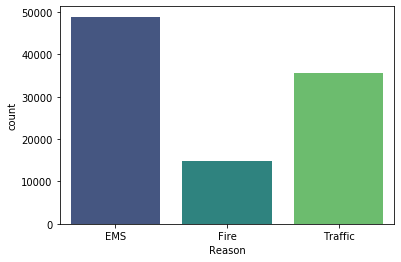

In [18]:
sns.countplot(x='Reason',data=df,palette='viridis')

___
### creating columns from the timestamp column

**Now I will begin to focus on time information.**

**What is the data type of the objects in the timeStamp column?**

In [53]:
type('timeStamp')


str

**With these timestamps still strings, I will use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [21]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [22]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**I can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**I will use Jupyter's tab method to explore the various attributes I can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. I will create these columns based off of the timeStamp column.**

In [23]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [24]:
time.year

2015

In [25]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [26]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**Using .map(), I will change the integers 0-6 to strings in days of the week**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [28]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [29]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


**I will now use a countplot from the seaborn library to create a countplot of the Day of Week and Month columns with the hue based off of the Reason column.**

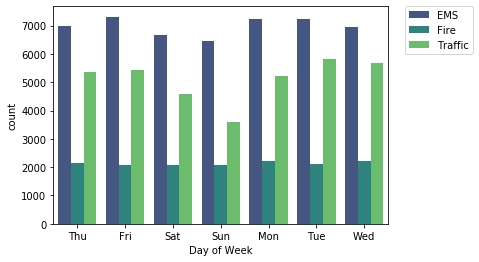

In [31]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

# to relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

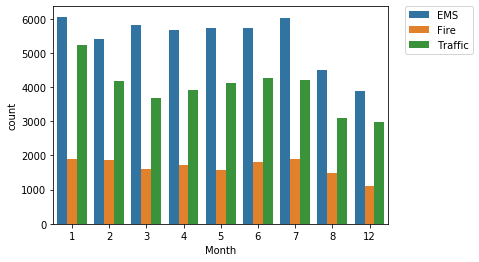

In [32]:
sns.countplot(x='Month', data=df, hue='Reason')

# to relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

**Taking a good look at the plot, one can notice that it is missing some months.**

**I will use pandas to fill in this information by plotting the information in another way by use of a simple line plot that fills in the missing months**

**Below I will create a gropuby object called byMonth, where I am to group the DataFrame by the month column and use the count() method for aggregation. Using the head() method on this returned DataFrame to check.**

In [33]:
byMonth = df.groupby('Month').count()

In [34]:
byMonth.head()

# irregular counts of values 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**A simple plot off of the dataframe indicating the count of calls per month.**

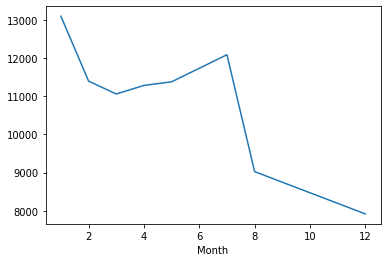

In [35]:
byMonth['addr'].plot()

**I will look to use seaborn's lmplot() to create a linear fit on the number of calls per month. I will need to reset the index.**

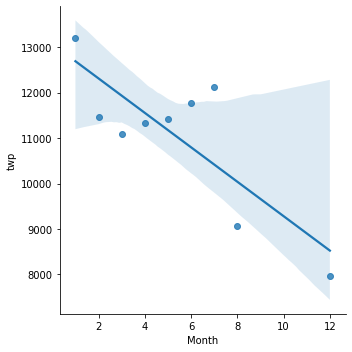

In [57]:
sns.lmplot(x='Month', y='twp',data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply() along with the .date() method. ** 

In [37]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


**Next, I'll groupby this newly created Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [38]:
df.groupby('Date').count().head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403


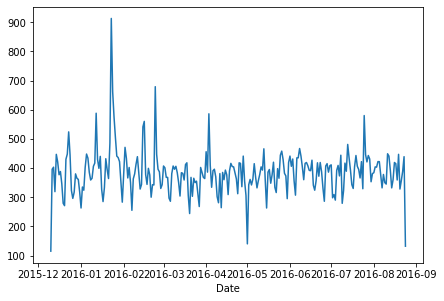

In [39]:
df.groupby('Date').count()['lng'].plot()

# to fix the x axis
plt.tight_layout(0.05)

**The following plots are going to be 3 seperate plots representing a Reason for the 911 call.**

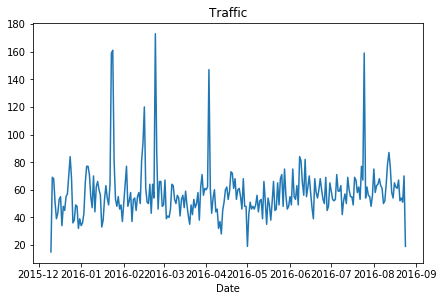

In [40]:
df[df['Reason']=='Fire'].groupby('Date').count()['lng'].plot()
plt.title('Traffic')
plt.tight_layout(0.05)

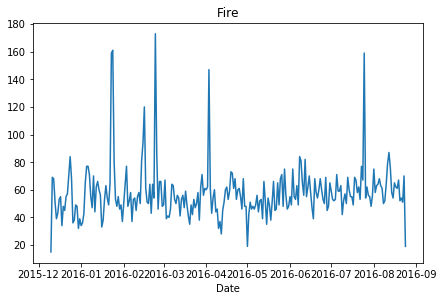

In [41]:
df[df['Reason']=='Fire'].groupby('Date').count()['lng'].plot()
plt.title('Fire')
plt.tight_layout(0.05)

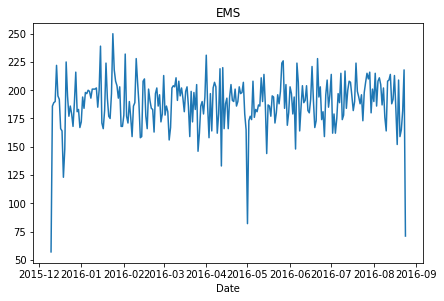

In [42]:
df[df['Reason']=='EMS'].groupby('Date').count()['lng'].plot()
plt.title('EMS')
plt.tight_layout(0.05)

____

## Conclusion

From the above analysis of the 911 Calls, we can deduce the following:

- EMS is the top reason for most 911 calls.
- Traffic is the second reason with Fire being a distant third. 
- From close observation, Tuesdays and Fridays are the days of week when most calls are made.
- Amongst the months of the year, July gets the highest number of calls barring none except January. 
- The month of December is when the least amount of 911 calls are made.

We can conclude that further analysis will need to be undertaken to figure out why EMS, Tuesdays and Fridays, and January are getting the most calls.


____